In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# Monitoring a deployed model

Your deployed ML model's performance in predicting heart disease has been steadily improving over the past few weeks, according to balanced accuracy logs. Which of the following could be an important, immediate next step?

### Possible Answers


    Retrain your model on the most recent data available; as the model is static (e.g., it has finished training), it is unlikely that its performance could be improving.
    
    
    Report this improving performance to the heart disease clinic - knowing your balanced accuracy performance metric is solid, it's exciting news that the model is performing so well!
    
    
    Investigate if the data input to your model has also been increasingly "easy" to predict. For example, the new data might be less noisy or more linearly separable, which could be an external factor improving your model's performance and not an inherent increase in the model's accuracy. {Answer}
    
    
    Disregard the change; if the model's performance was degrading, this would be more serious, but since your balanced accuracy metric is sound, improving performance is a good thing.

**Great! Nothing in the machine learning lifecycle should be taken at face value: even if the improvement in model performance is genuine, it is still important to investigate any significant changes - especially during production/deployment; while there may be many reasons for the change, checking the input data is probably a good start.**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

logs_january = pd.read_csv(path_data+'logs_january.csv').drop('index', axis=1)
logs_february = pd.read_csv(path_data+'logs_february.csv').drop('index', axis=1)

display(logs_january.head(), logs_february.head())

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.025143,-2.523434,0.633919,-2.058321,0.186454,0
1,0.628346,-1.209464,0.624120,0.778613,-0.012247,1
2,-0.792873,0.736444,-0.530258,1.173294,-0.107030,1
3,-1.867265,-1.268984,2.314659,-1.207572,0.686260,0
4,1.687142,0.556003,-1.081548,0.964233,0.881640,1


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.025143,-2.523434,0.633919,-2.058321,0.186454,0
1,0.628346,-1.209464,0.624120,0.778613,-0.012247,1
2,-0.792873,0.736444,-0.530258,1.173294,-0.107030,1
3,-1.867265,-1.268984,2.314659,-1.207572,0.686260,0
4,1.687142,0.556003,-1.081548,0.964233,0.881640,1


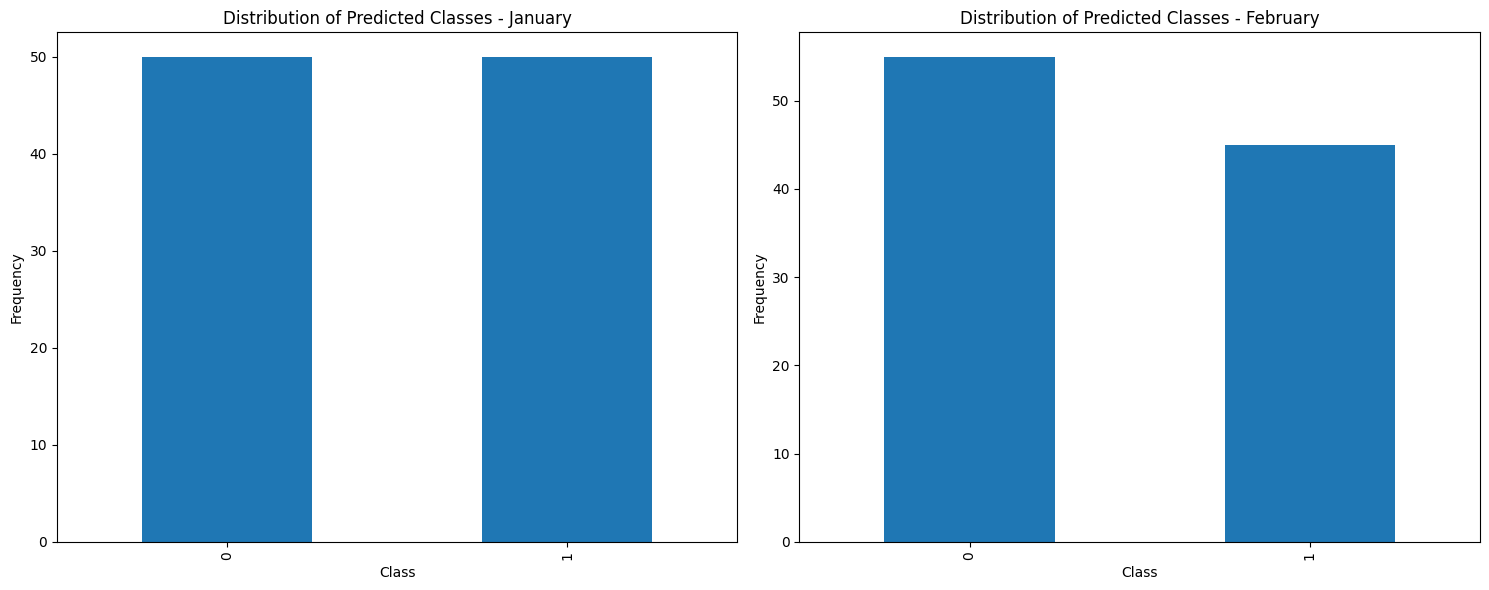

"\nMagnificent monitoring! You have generated a visualization of your model's predictions over time. While the difference is quite subtle, note the change in distribution between positive and negative predictions. It is up to you as a practitioner to determine whether this is significant or not. Automating this process, and adding checks for any other anomalous results, will help in the ongoing effort toward improving and maintaining your deployed heart disease model.\n"

In [17]:
# exercise 01

"""
Visualizing a deployed model's output over time

In this exercise, you will utilize data from two separate months - January and February - to monitor changes in your heart disease model's predictions over time. As you know, your model has been trained to perform a binary classification task of heart disease classification, and you have recorded the model's predictions in the logs for these two months.

Assume that the logs of the model's predictions over the last two months have been generated through Elastic Beanstalk and have been imported as pandas DataFrame, called logs_january and logs_february, with a target column of the predictions for that month. matplotlib.pyplot has been imported as plt.
"""

# Instructions

"""

    Visualize the distribution of your model's predictions in January and February over time by plotting adjacent bar graphs of the model's target predictions.

"""

# solution

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns
# January Plot
logs_january['target'].value_counts().plot(kind='bar',  ax=ax[0])
ax[0].set_title('Distribution of Predicted Classes - January')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

# February Plot
logs_february['target'].value_counts().plot(kind='bar',  ax=ax[1])
ax[1].set_title('Distribution of Predicted Classes - February')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#----------------------------------#

# Conclusion

"""
Magnificent monitoring! You have generated a visualization of your model's predictions over time. While the difference is quite subtle, note the change in distribution between positive and negative predictions. It is up to you as a practitioner to determine whether this is significant or not. Automating this process, and adding checks for any other anomalous results, will help in the ongoing effort toward improving and maintaining your deployed heart disease model.
"""

# Techniques for detecting and correcting data drift

In machine learning, it's essential to understand how to maintain a deployed model's performance over time. One familiar challenge practitioners face is data drift, which occurs when the distribution of input data changes. Data drift can lead to decreased model performance and inaccurate predictions.

What are the appropriate steps for detecting and correcting data drift in machine learning models? (Select all that apply).

### Possible Answers

Continue using the model as-is; retraining the model is a resource-intensive procedure, and data drift does not necessarily imply that model performance declines.


Use the Kolmogorov-Smirnov test to detect data drift by comparing the statistical properties of the current inference data with those of the initial training dataset.{Answer}


When data drift is detected, retrain the model on the old data.


Use the Population Stability Index (PSI) to compare the distribution of a single categorical variable or a specific column in two different datasets.{Answer}


Utilize the Evidently or NannyML Python library to detect and rectify data drift in machine learning models.{Answer}

In [18]:
import numpy as np

january_data = np.array([    1,    25, 50000,     2,    30, 55000,     3,    35, 60000,
           4,    40, 65000,     5,    45, 70000,     6,    50, 75000,
           7,    55, 80000,     8,    60, 85000])

february_data = np.array([    1,    26, 50500,     2,    31, 55500,     3,    36, 60500,
           4,    41, 65500,     5,    46, 70500,     6,    51, 75500,
           7,    56, 80500,     8,    61, 85500])

In [19]:
# exercise 02

"""
Detecting data drift using the Kolmogorov-Smirnov test

After successfully deploying your heart disease prediction model, you've been monitoring its performance and input data. You've noticed that the distribution of some key features in the recent data collected in February looks a bit different from the data you trained on in January. Such discrepancies can affect the model's performance, and it's crucial to detect and address them.

In this exercise, you will use the Kolmogorov-Smirnov (K-S) test to detect any potential data drift between the January and February datasets. Sample datasets called january_data and february_data are already loaded for you.
"""

# Instructions

"""

    Import the ks_2samp function from the scipy.stats module.

    Use the provided sample datasets january_data and february_data to perform the Kolmogorov-Smirnov test; calculate the test statistic and p-value.

    Check if the p-value is less than 0.05, indicating data drift; if data drift is detected, print "Data drift detected.", otherwise, print "No data drift detected."

"""

# solution

# Import the ks_2samp function
from scipy.stats import ks_2samp

# Calculate the test statistic and p value
test_statistic, p_value = ks_2samp(january_data, february_data)

# Check the p-value and print the detection result
if p_value <= 0.05:
	print("Data drift detected.")
else:
	print("No data drift detected.")

#----------------------------------#

# Conclusion

"""
Delightful data-drift detection! You have successfully tested data from two different months for data drift using the Kolmogorov-Smirnov test. By monitoring data drift in your models, you can ensure that they remain accurate and up-to-date over time. Remember to consider other methods and libraries like Population Stability Index (PSI) and Evidently for detecting data drift in different scenarios.
"""

No data drift detected.


'\nDelightful data-drift detection! You have successfully tested data from two different months for data drift using the Kolmogorov-Smirnov test. By monitoring data drift in your models, you can ensure that they remain accurate and up-to-date over time. Remember to consider other methods and libraries like Population Stability Index (PSI) and Evidently for detecting data drift in different scenarios.\n'

# Conceptualizing the feedback loop

Which of the following best describes the concept of a feedback loop in Machine Learning?

### Possible Answers


    A system which can detect data drift
    
    
    Retraining the model if performance degrades
    
    
    A system where the model's outputs are sent back to the model as inputs
    
    
    A system in which various system metrics are used to inform or drive changes in the system {Answer}
    

# Dangers of feedback loops

Select the feedback loop scenarios which could likely lead to dangerous or unwanted outcomes.

### Possible Answers

    A heart disease diagnosis model which is retrained when data drift is detected.


    A social media recommendation algorithm which periodically retrains it's model based on user preferences in order to maximise engagement.{Answer}


    A speech recognition system is initially trained on a broad dataset and subsequently fine-tuned on a narrower, user-specific dataset to improve its performance.


    A credit scoring model that changes a user's credit score based on their recent transactions, which in turn influences the user's future ability to take credit, impacting their subsequent transactions.{Answer}

In [21]:
from sklearn.metrics import balanced_accuracy_score

jan_data_samples = np.array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

feb_data_samples = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [23]:
true_labels_feb = np.array([1,0,1,1,0,0,1,0,1,1])
predicted_labels_feb = np.array([1,0,0,1,0,1,1,1,1,0])

In [24]:
# exercise 03

"""
Feedback loops

In real-world ML applications, it's not enough to just deploy a model and forget about it. As the data evolves, so should the model. The feedback loop is a way of ensuring that the model is continuously learning and adapting to changing data. Imagine that your heart disease model has been in production for a few months. As part of continuous monitoring and improvement, you want to assess the model's current performance and determine the need for potential retraining or adjustments. balanced_accuracy_score is imported for you from sklearn.metrics, ks_2samp is imported from scipy.stats, and two samples of the models true_labels_feb and predicted_labels_feb for the current time period have been predefined. Finally jan_data_samples and feb_data_samples have been loaded.
"""

# Instructions

"""
     Compute and print the balanced accuracy of the model, comparing it to the prior month's balanced accuracy.
---
    Check for data drift using the Kolmogorov-Smirnov test.
---
Question

    Based on the model's accuracy and the data drift evaluation, do you think it's necessary to set up a feedback loop for retraining or adjustments?

Possible answers:
    
    Yes, but only due to data drift.
    
    Yes, but only due to the accuracy drop.
    
    Yes, both the accuracy drop and data drift indicate the model needs retraining. {Answer}
    
    No, the model seems to be performing well and there's no significant data drift.
"""

# solution

# Calculate and print the balanced accuracy of the model
balanced_accuracy_jan = 60.0
balanced_accuracy_feb = balanced_accuracy_score(true_labels_feb, predicted_labels_feb) * 100
print(f"Model Balanced Accuracy In February: {balanced_accuracy_feb:.2f}%")
print(f"Is there a decline in accuracy? {'Yes' if balanced_accuracy_feb < balanced_accuracy_jan else 'No'}")

# Use the Kolmogorov-Smirnov test to check for data drift
ks_statistic, p_value = ks_2samp(jan_data_samples, feb_data_samples)

significant_drift = p_value < 0.05

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Is there significant data drift? {'Yes' if significant_drift else 'No'}")

#----------------------------------#

# Conclusion

"""
Fantastic feedback-looping! A feedback loop becomes important when models and/or data is degrading. It's important to ensure that monitoring solutions are implemented in production to check for when a feedback loop might become necessary. At the same time, however, don't forget the potential dangers of feedback loops in ML, and always aim to implement them responsibly.
"""

Model Balanced Accuracy In February: 58.33%
Is there a decline in accuracy? Yes
Kolmogorov-Smirnov Statistic: 0.1310
P-value: 0.0000
Is there significant data drift? Yes


"\nFantastic feedback-looping! A feedback loop becomes important when models and/or data is degrading. It's important to ensure that monitoring solutions are implemented in production to check for when a feedback loop might become necessary. At the same time, however, don't forget the potential dangers of feedback loops in ML, and always aim to implement them responsibly.\n"

# Model monitoring case study

In this final exercise, you will be presented with a complex scenario that involves a number of aspects covered in this section on Model Monitoring. Your task is to analyze the situation, identify the correct steps to take, and arrange them in the proper order to demonstrate your understanding of the concepts introduced.

Read the given scenario and sort the following steps in the correct order. This exercise is designed to test your ability to analyze a complex, real-world situation and apply the knowledge you have gained throughout the chapter.

Scenario: You are working as a machine learning engineer for a health tech company. Your team has recently deployed a proof-of-concept binary classification model for heart disease prediction in your production environment, serving it to end users. After a few weeks, you notice some inconsistencies in the predictions, and the system's performance seems to have deteriorated; a few users have also reported inaccurate results for recent data. You are asked to monitor the model and ensure that it continues to provide accurate and relevant recommendations.

![Answer](/home/nero/Documents/Estudos/DataCamp/Python/courses/end-to-end-machine-learning/ch_04-01.png)